<font size="5">**How an Article Gains Its Popularity**</font>


Here is the link to the data set we will be using, Online News Populartiy from the UCI Machine Learning Resprotory.
Subsiquent sources can be found in the link on the UCI web page.
Link: https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

**Introduction:** The data set we chose for our project summarizes a set of features of articles published by a digital media platform named “Mashable” over a two year period. We are interested in determining the features that influence the popularity of an article; the question we are trying to answer is “how many shares will an article with specific features (i.e., a particular word count) generate?” The features (predictors) that we are interested in are listed below:

* n_tokens_title: Number of words in the title
* n_tokens_content: Number of words in the content  
* n_unique_tokens: Rate of unique words in the content 
* num_hrefs: Number of links 
* num_imgs: Number of images 
* num_videos: Number of videos 
* average_token_length: Average length of the words in the content 
* shares: Number of shares (target)

**Methods:** We choose to use regression to conduct this data analysis as the value we are predicting "sahres" is quantitative. With continuous data, regression can have a more precise prediction of the quantity. In order to have a precise and accurate prediction which factors can affect the shares based on the content of an article, we filter our columns down to the ones listed in the introduction as they are most relavent to our prediction. 

In order to understand the prediction with clear, readable and straightforward results, we decide to use a histogram chart to show. The advantage of histogram is that it can provide the relationship of the frequency with the other factors, and these histogram charts can easily help us to compared the relationship between the these factors and the shares to tell which one affect the most or least. 

**Expected Outcomes:** Some of our initial expectations include that articles that are of higher popularity (shares), are likely to have a higher number of images and videos, and not have an overly excessive word count when compared to articles with a lower number of shares. We belive a middle ground word count will maximize shares.

Impact-wise, our findings may help inform whether optimization of a variety of features in an article may have a synergistic-like effect on the article's number of shares (and associated popularity). Perhaps, these findings may educate how articles are written in the future and/or what features are included or integrated into articles, assuming that they serve as reliable or accurate predictors for article shares.

Looking to the future, questions that we may have include whether these trends are consistent across other media platforms in other countries (and hence whether any correlations or links between article features and number of shares may be cross-applied to stragies employed by other platforms), and whether some article features have been overlooked (and not included in the dataset).


In [1]:
#Run this cell to import the packages that will be required for this project to run
library(repr)
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
#reading the data file into R via a relative path
popularity<-read_csv("../data/OnlineNewsPopularity.csv")
head(popularity)

Rows: 39644 Columns: 61
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): url
dbl (60): timedelta, n_tokens_title, n_tokens_content, n_unique_tokens, n_no...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,⋯,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.6635945,1,0.8153846,4,2,1,⋯,0.10000000,0.7,-0.3500000,-0.600,-0.2000000,0.5000000,-0.1875000,0.00000000,0.1875000,593
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731,9,255,0.6047431,1,0.7919463,3,1,1,⋯,0.03333333,0.7,-0.1187500,-0.125,-0.1000000,0.0000000,0.0000000,0.50000000,0.0000000,711
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731,9,211,0.5751295,1,0.6638655,3,1,1,⋯,0.10000000,1.0,-0.4666667,-0.800,-0.1333333,0.0000000,0.0000000,0.50000000,0.0000000,1500
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731,9,531,0.5037879,1,0.6656347,9,0,1,⋯,0.13636364,0.8,-0.3696970,-0.600,-0.1666667,0.0000000,0.0000000,0.50000000,0.0000000,1200
http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.4156456,1,0.5408895,19,19,20,⋯,0.03333333,1.0,-0.2201923,-0.500,-0.0500000,0.4545455,0.1363636,0.04545455,0.1363636,505
http://mashable.com/2013/01/07/beewi-smart-toys/,731,10,370,0.5598886,1,0.6981982,2,2,0,⋯,0.13636364,0.6,-0.1950000,-0.400,-0.1000000,0.6428571,0.2142857,0.14285714,0.2142857,855


In [3]:
#Wrangling
popularity_tidy <- popularity |> 
#removing columns that are specifically not litsted as predictors as well as columns that self reference articles.
select(-url, -timedelta , - num_self_hrefs, -self_reference_min_shares:-self_reference_avg_sharess,
      -is_weekend, -kw_min_min:-kw_avg_avg, -LDA_00:-LDA_04, -global_subjectivity:-abs_title_sentiment_polarity,
      -n_non_stop_words,-n_non_stop_unique_tokens, -data_channel_is_lifestyle:-weekday_is_sunday, -num_keywords) 


glimpse(popularity_tidy)


Rows: 39,644
Columns: 8
$ n_tokens_title       <dbl> 12, 9, 9, 9, 13, 10, 8, 12, 11, 10, 9, 10, 9, 9, …
$ n_tokens_content     <dbl> 219, 255, 211, 531, 1072, 370, 960, 989, 97, 231,…
$ n_unique_tokens      <dbl> 0.6635945, 0.6047431, 0.5751295, 0.5037879, 0.415…
$ num_hrefs            <dbl> 4, 3, 3, 9, 19, 2, 21, 20, 2, 4, 11, 7, 18, 4, 19…
$ num_imgs             <dbl> 1, 1, 1, 1, 20, 0, 20, 20, 0, 1, 1, 1, 11, 0, 9, …
$ num_videos           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 21, 0, 0, …
$ average_token_length <dbl> 4.680365, 4.913725, 4.393365, 4.404896, 4.682836,…
$ shares               <dbl> 593, 711, 1500, 1200, 505, 855, 556, 891, 3600, 7…


In [4]:
#Splitting the data into training and testing data
#Strata = the day the article was published
popularity_split<- initial_split(popularity_tidy, prop = .75, strata = shares)
popularity_train<- training(popularity_split)
popularity_test <- testing(popularity_split)


In [5]:
#Initial exploration table
#Found the mean values of each of our predictors
initial_table <- popularity_train |>
map_df(mean, na.rm =TRUE)
initial_table

n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_imgs,num_videos,average_token_length,shares
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10.39241,545.2856,0.5545818,10.84633,4.522972,1.238262,4.547249,3422.531


Warning message:
“Removed 322 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


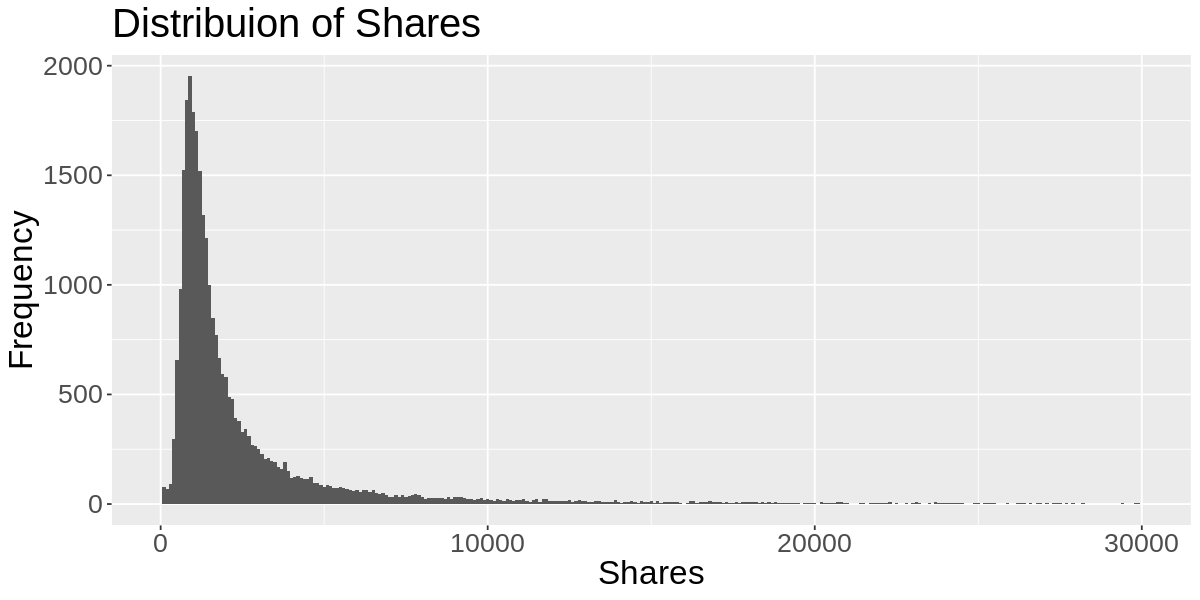

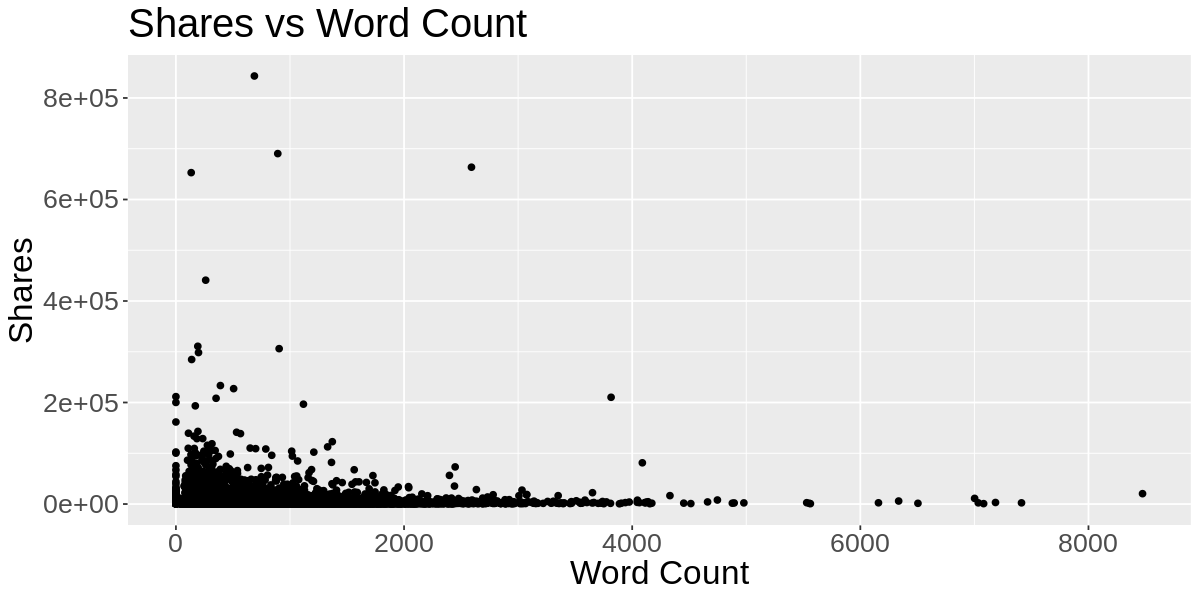

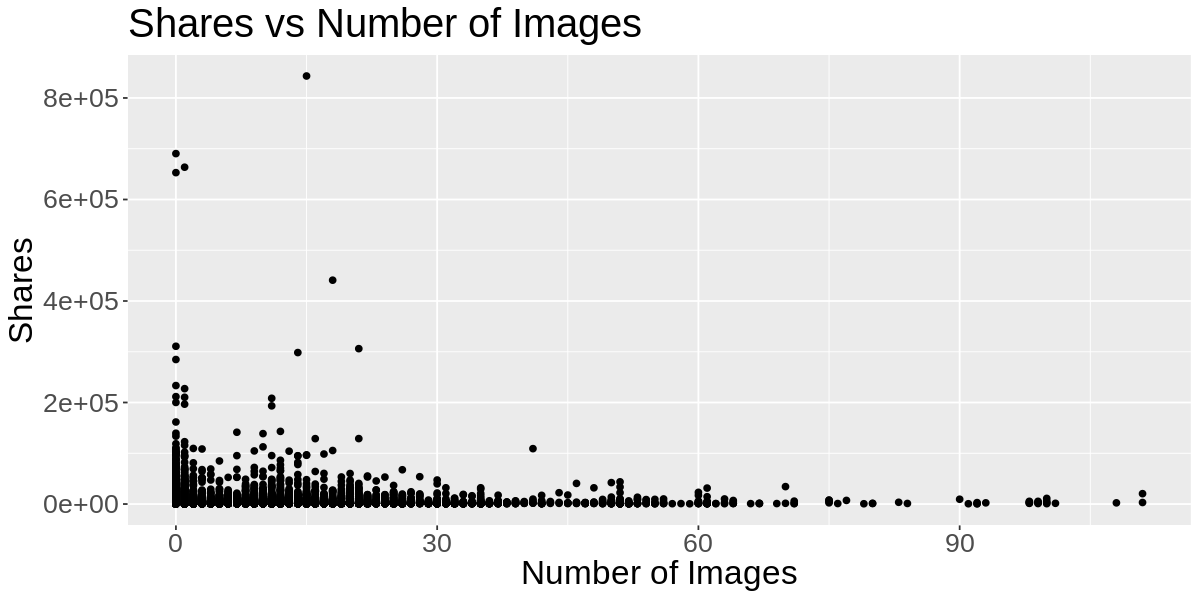

In [9]:
#Below are the distributions of the 3 most varable categoreis in our data set. Though some of the categories are less variable, we belive 
#they will still be good predictors of shares.

options(repr.plot.width = 10, repr.plot.height =5)

shares_plot <- popularity_train |> 
ggplot(aes(x = shares)) + geom_histogram(binwidth = 100)+xlim(0,30000) +labs(x = "Shares" , y = "Frequency") +
ggtitle("Distribuion of Shares") + theme(text = element_text(size = 20))

shares_vs_word_count_plot <- popularity_train |>
ggplot(aes(x = n_tokens_content , y = shares)) + geom_point() + xlab("Word Count") + ylab("Shares") + ggtitle("Shares vs Word Count") +
theme(text = element_text(size = 20))

shares_vs_images_plot <- popularity_train |>
ggplot(aes(x = num_imgs , y = shares)) + geom_point() + xlab("Number of Images") + ylab("Shares") + ggtitle("Shares vs Number of Images") +
theme(text = element_text(size = 20))



shares_plot
shares_vs_word_count_plot
shares_vs_images_plot